# **Economics 416 Project 1**
2008 Election Data Analysis
by Patrick Seib



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
xls = pd.ExcelFile('/content/drive/My Drive/Election2008.xlsx')
df1 = pd.read_excel(xls, 'Democrat')
df2 = pd.read_excel(xls, 'Republican')

ModuleNotFoundError: No module named 'numpy'

After loading the data, I did a little bit of visual exploration to explore what the data looked like over time.

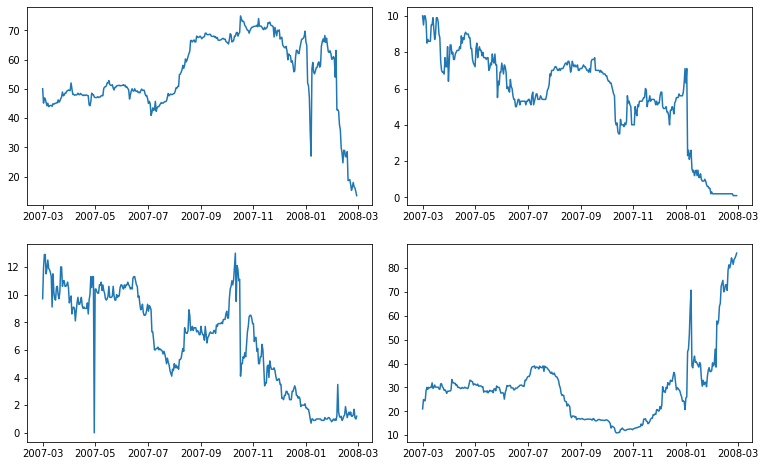

In [ ]:
fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

x = df1.Date
y = [df1.Clinton, df1.Edwards, df1.Gore, df1.Obama]
for i in range(0,4):
  ax = fig.add_subplot(2,2,i+1)
  ax.plot(x,y[i])

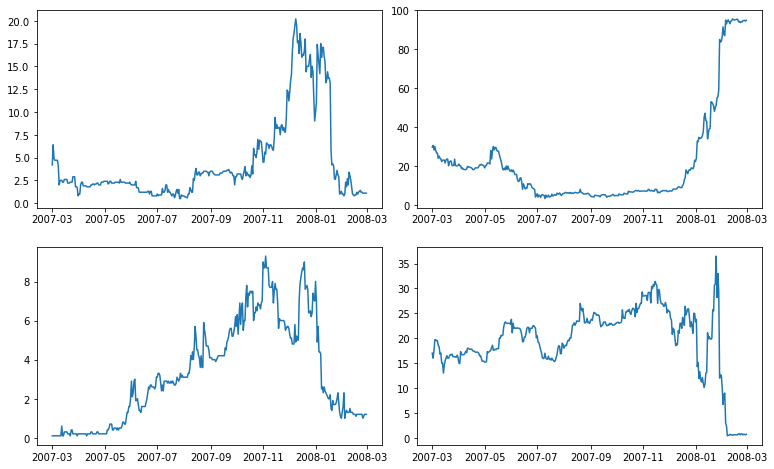

In [ ]:
fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

x = df2.Date
y = [df2.Huckabee, df2.McCain, df2.Paul, df2.Romney]
for i in range(0,4):
  ax = fig.add_subplot(2,2,i+1)
  ax.plot(x,y[i])

# Project Question 1
The implications of no-arbitrage opportunity in this prediction market are that


1.   The sum of each candidates probability at each date is equal to or greater than 1
2.   Probability of a given asset = the price of that asset

Is this satisfied?



In [ ]:
x = df1.sum()
print(x/365)

y = df2.sum()
print(y/365)

Clinton    55.264110
Obama      30.120274
Edwards     5.647671
Gore        6.659726
dtype: float64
McCain      21.285753
Romney      19.682466
Huckabee     4.550685
Paul         3.300274
dtype: float64


<ipython-input-50-581b89bd4d59>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x = df1.sum()
<ipython-input-50-581b89bd4d59>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df2.sum()


In [ ]:
print((x.Clinton + x.Edwards + x.Gore + x.Obama)/365)
print((y.Huckabee + y.McCain + y.Huckabee + y.Paul)/365)

97.6917808219178
33.68739726027397


Even a glance at the data reveals that if these options were the only available options in the market, there would be opporunity for arbitrage. The above calculations check the aggregate, over all 365 days that the market was open, and again, if those were the only options there would be opportunity for arbitrage.


For the democrats, this opportunity is small, though, and narrows over time. It's small enough that it can be explained by bid-ask spread and transaction fees. Nearing the end of the market trading days, the arbitrage opportunity has clearly closed.

For the republicans, this opportunity at the aggregate looks much larger. However much like the democrats, it narrows over time.

In [ ]:
x = df1.tail().sum()
print((x.Clinton + x.Edwards + x.Gore + x.Obama)/5)

y = df2.tail().sum()
print((y.Huckabee + y.McCain + y.Huckabee + y.Paul)/5)

101.22
98.08000000000001


<ipython-input-52-b98004a8aa76>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x = df1.tail().sum()
<ipython-input-52-b98004a8aa76>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df2.tail().sum()


Is it possible to accurately forecast the price of any given asset the previous day? There are many ways to forecast any given time series data. I'll take the example of Obama's probability of winning to show that forecasting this data is unlikely or impossible.

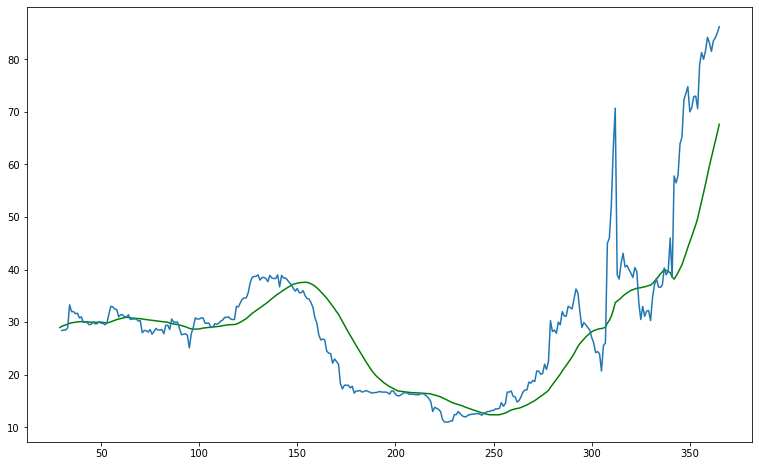

In [ ]:
import statsmodels.api as sm

def plot_moving_average(series, window):
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(13,8))
    plt.plot(rolling_mean, 'g')
    plt.plot(series[window:])

plot_moving_average(df1.Obama, 30)

0.9905524245673631


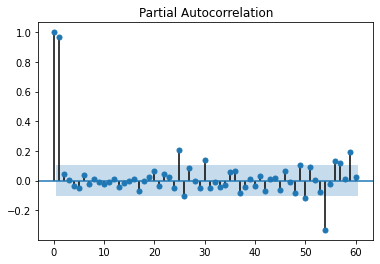

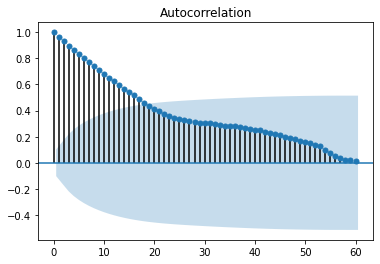

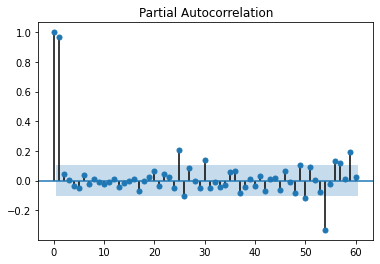

In [ ]:
#### Runs augmented Dickey-Fuller test to check for stationarity
print(sm.tsa.stattools.adfuller(df1.Obama)[1])

import statsmodels.tsa.api as smt

smt.graphics.plot_acf(df1.Obama, lags=60)
smt.graphics.plot_pacf(df1.Obama, lags=60)

The moving average plot and Dickey-Fuller test result make clear that

1. The series is non-stationary
2. The series doesn't have a seasonal component
3. The series has high auto-correlation

This might mean that the series can be forecasted, but also that the series is non-deterministic, and also not stochastic and any forecasts would be extremely inaccurate. Furthermore, the major shifts in value of the asset isn't determind by any endogenous qualities. Because of this, forecasting the series for the purposes of arbitrage isn't possible.